# **Simple Exploration Notebook - Instacart**
Context: Explore the basic information about the given dataset

Goal: To predict which products will be in a user's next order



**New functions I learned from this kaggle:**

- **pd.pivot(index=" ", columns=" ",values=" ")**
   - 데이터의 열을 기준으로 피벗 테이블로 변환시키는 메서드
   - index: 인덱스로 사용될 열

     columns: 열로 사용될 열

     values: 값으로 입력될 열
   * index나 columns에 리스트를 입력할 경우 멀티 인덱스로 피벗테이블이 생성됨.
   * values에 리스트를 입력할 경우 테이블이 연속적으로 옆으로 이어져 생성됨.

- **pd.merge(df_left, df_right, on=" ", how=" ")**

  **또는**

  **pd.merge(df_left, df_right, left_on=" ", right_on=" ", how=" ")**
   - 두 데이터프레임(df_left, df_right)을 각 데이터에 존재하는 고유값(key)을 기준으로 병합하는 메서드
   - on: (두 데이터프레임의 기준열 이름이 같을 때) 병합 기준이 되는 기준열 이름

     left_on: (기준열 이름이 다를 때) 왼쪽df의 기준열 이름

     right_on: (기준열 이름이 다를 때) 오른쪽df의 기준열 이름

     how: 병합시 데이터가 나타나는 기준df, {'left', 'right', 'inner', 'outer'}이 있음, 디폴트는 'inner', how='left'면 df_left의 모든 데이터를 나타냄.

- **plt.pie(data, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False))**
   - matplotlib.pyplot의 메소드. 범주별 구성 비율을 원으로 표현한 그래프인 pie chart 생성
   - data, labels는 ndarray형식이어야 함. np.array()로 변환시켜주기.
   - autopct: 부채꼴 안에 표시될 숫자의 형식을 지정. 소숫점 한자리까지 표시하도록 설정.
     
     startangle: 부채꼴 그려지는 시각 각도 설정. 디폴트는 0도(양의 방향 x축).

     counterclock: 시계방향 순서 여부. False면 시계방향.


In [ ]:
import numpy as np   # linear algebra
import pandas as pd   # data processing, CSV file I/0 (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None   # default='warn'

In [ ]:
from subprocess import check_output
print(check_output(["ls", "/content/"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_data
sample_submission.csv



In [ ]:
order_products_train_df = pd.read_csv("/content/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/order_products__prior.csv")
orders_df = pd.read_csv("/content/orders.csv")
products_df = pd.read_csv("/content/products.csv")
aisles_df = pd.read_csv("/content/aisles.csv")
departments_df = pd.read_csv("/content/departments.csv")

In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


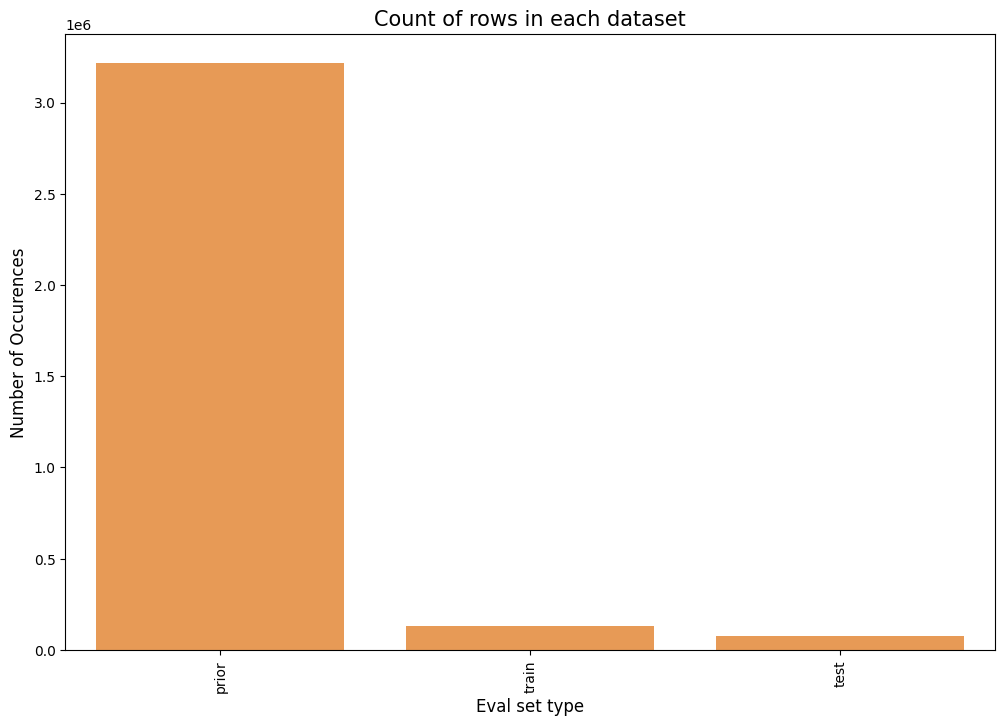

In [ ]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs=orders_df.groupby('eval_set')['user_id'].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


<ipython-input-9-547878c447f2>:1: FutureWarning: The provided callable <function max at 0x7963924eb9a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs=orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


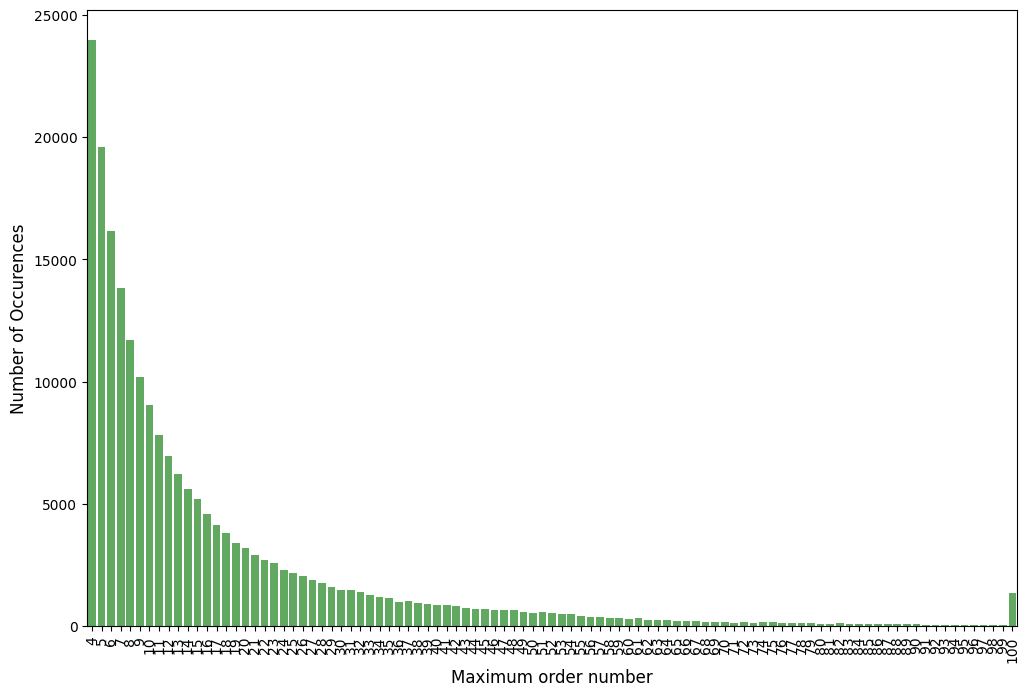

In [ ]:
cnt_srs=orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs=cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

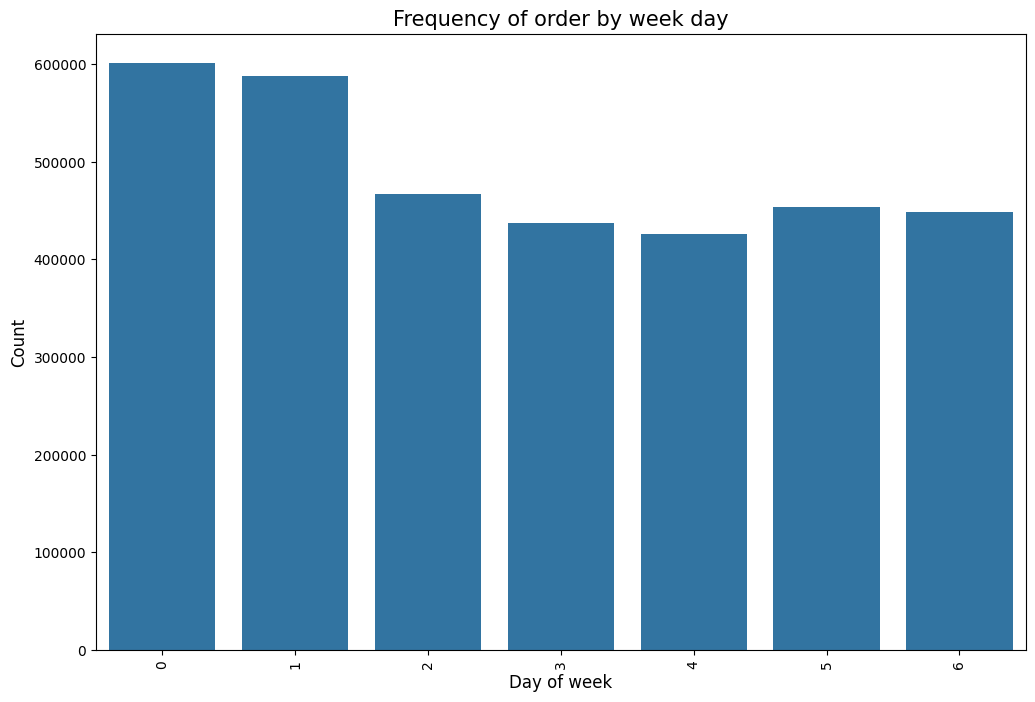

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by week day', fontsize=15)
plt.show()

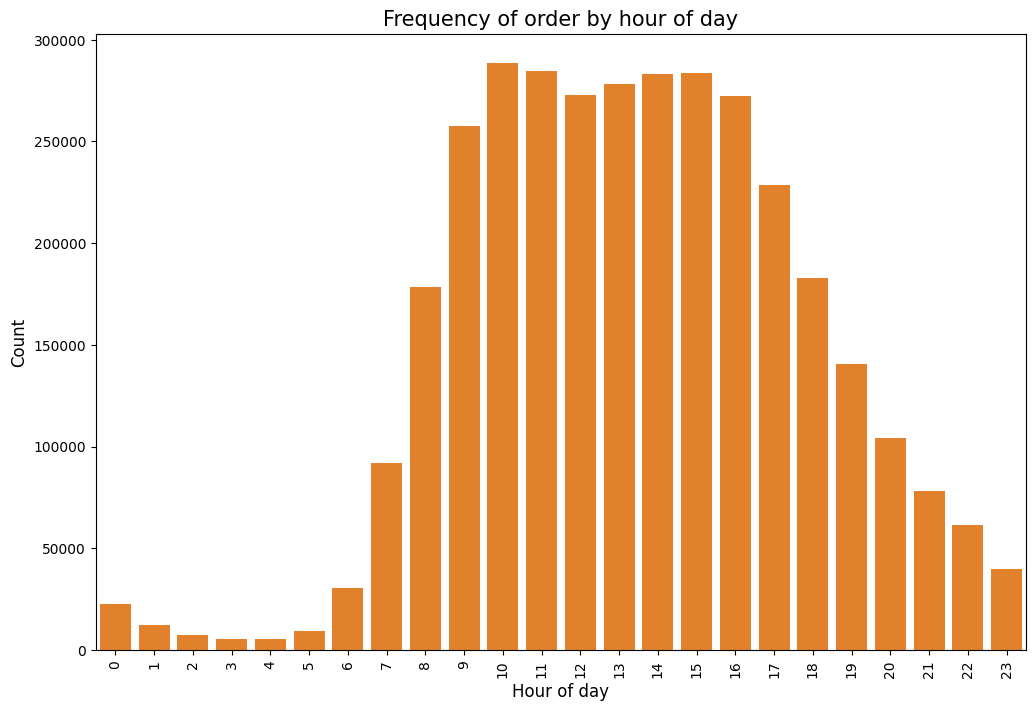

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

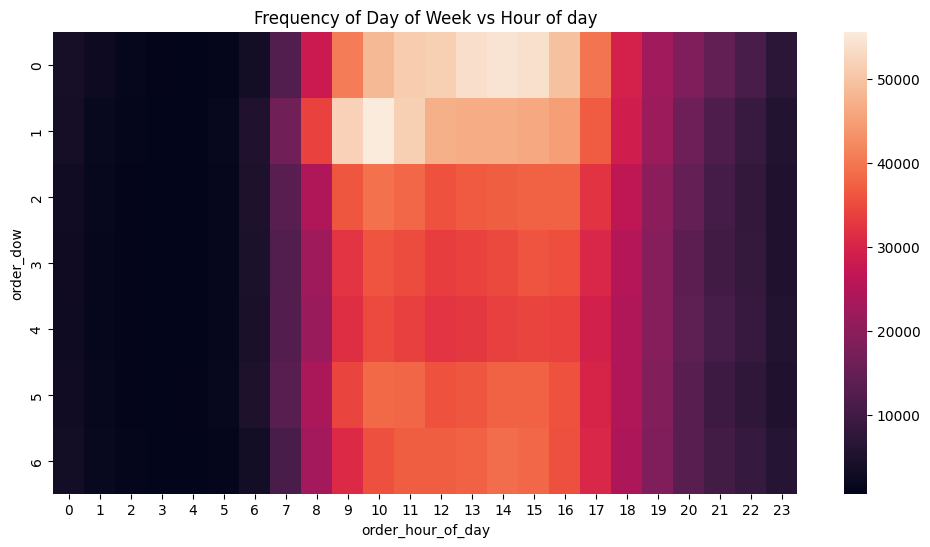

In [ ]:
grouped_df = orders_df.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of Week vs Hour of day")
plt.show()

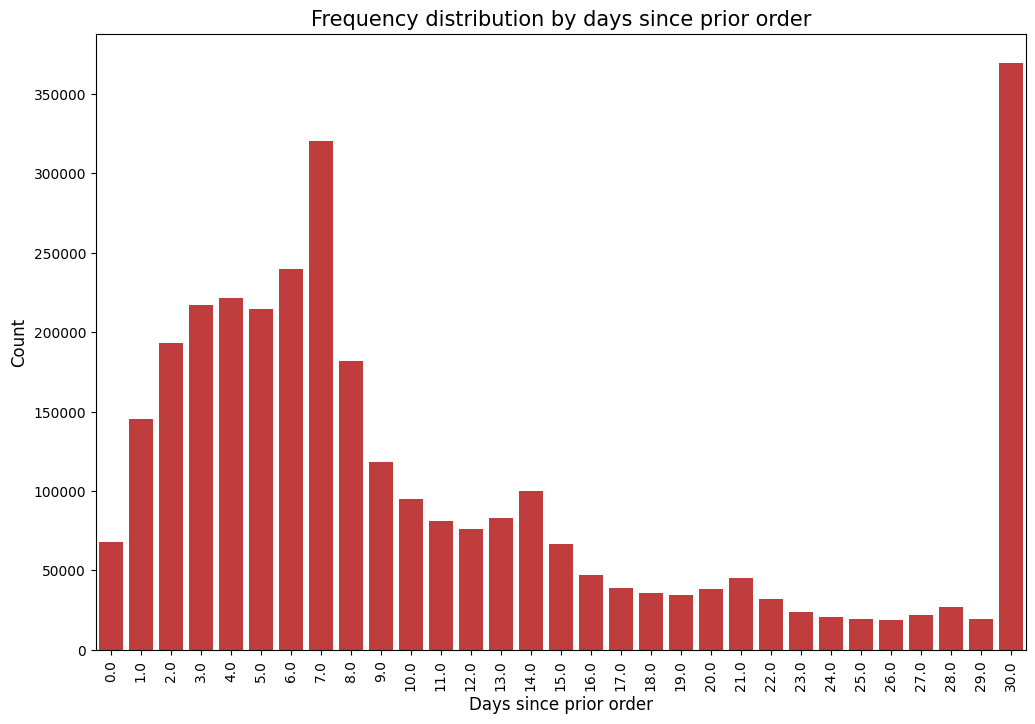

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency distribution by days since prior order', fontsize=15)
plt.show()

In [ ]:
# percentage of re-orders in prior set
order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0]

0.5894807337268876

In [ ]:
# percentage of re-orders in train set
order_products_train_df.reordered.sum()/order_products_train_df.shape[0]

0.5985944127509629

In [ ]:
grouped_df=order_products_prior_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df.loc[grouped_df["reordered"] > 1, "reordered"] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1.0,0.878872
0.0,0.121128


In [ ]:
grouped_df = order_products_train_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped_df.loc[grouped_df["reordered"] > 1, "reordered"] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.93444
0,0.06556


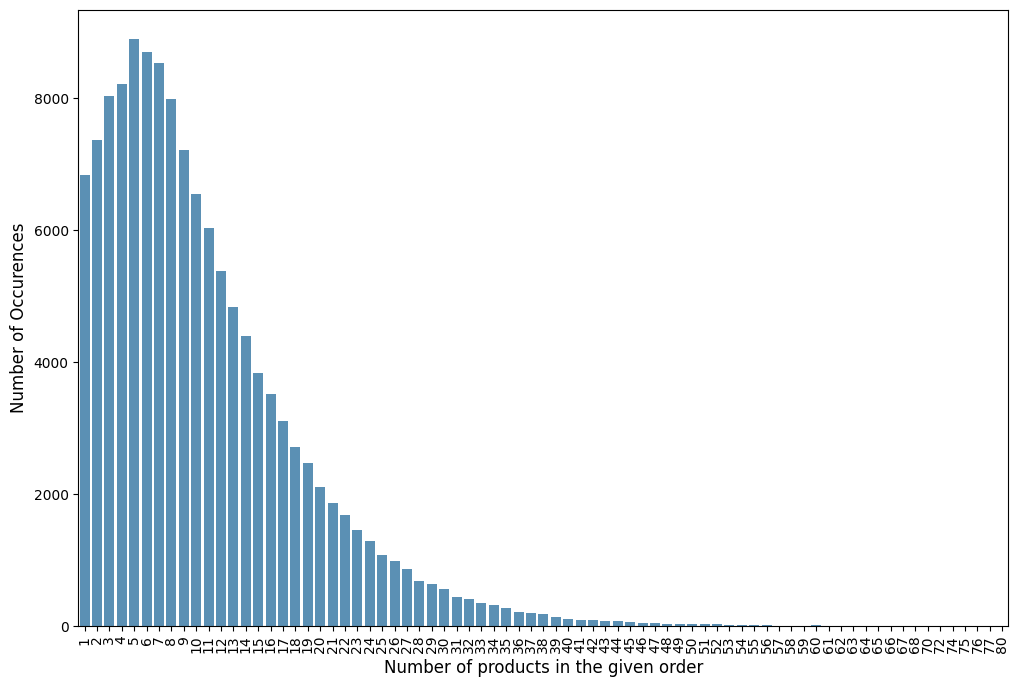

In [ ]:
grouped_df = order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs
1,2,28985.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce
2,2,9327.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings,pantry
3,2,45918.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars,pantry
4,2,30035.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients,pantry


In [ ]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,127102
1,Bag of Organic Bananas,101725
2,Organic Strawberries,71315
3,Organic Baby Spinach,64500
4,Organic Hass Avocado,57216
5,Organic Avocado,47141
6,Large Lemon,40908
7,Strawberries,38374
8,Limes,37590
9,Organic Whole Milk,36977


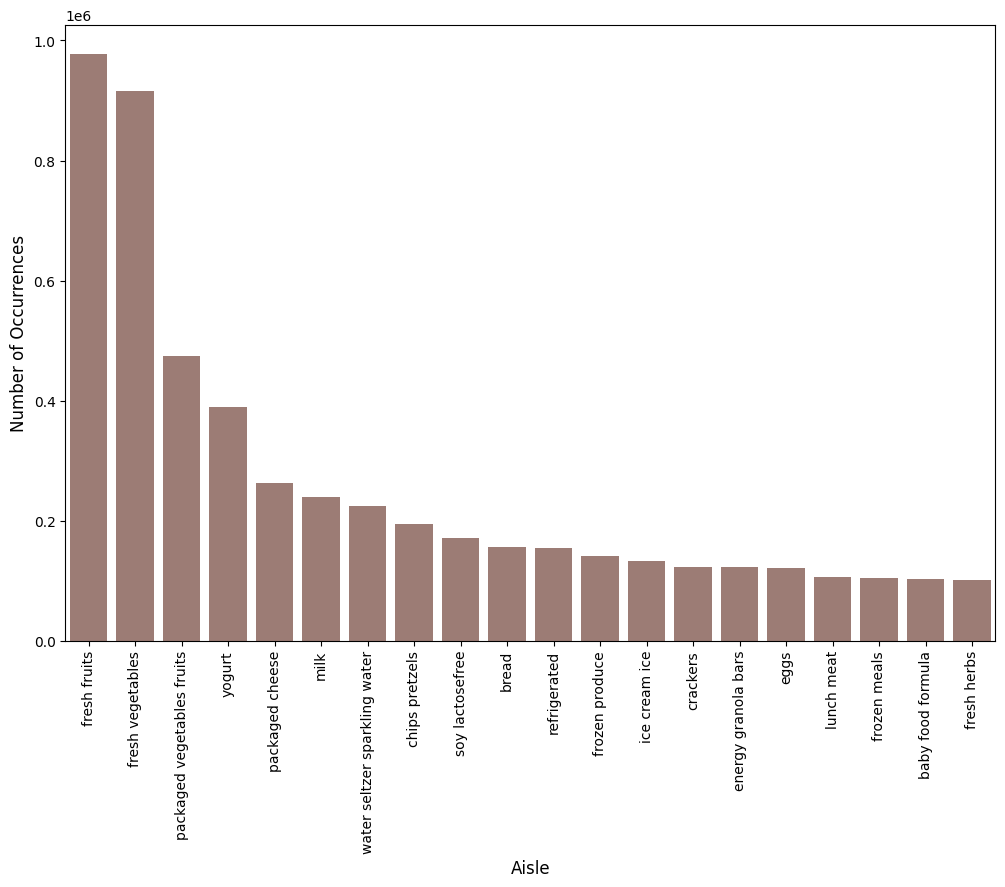

In [ ]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

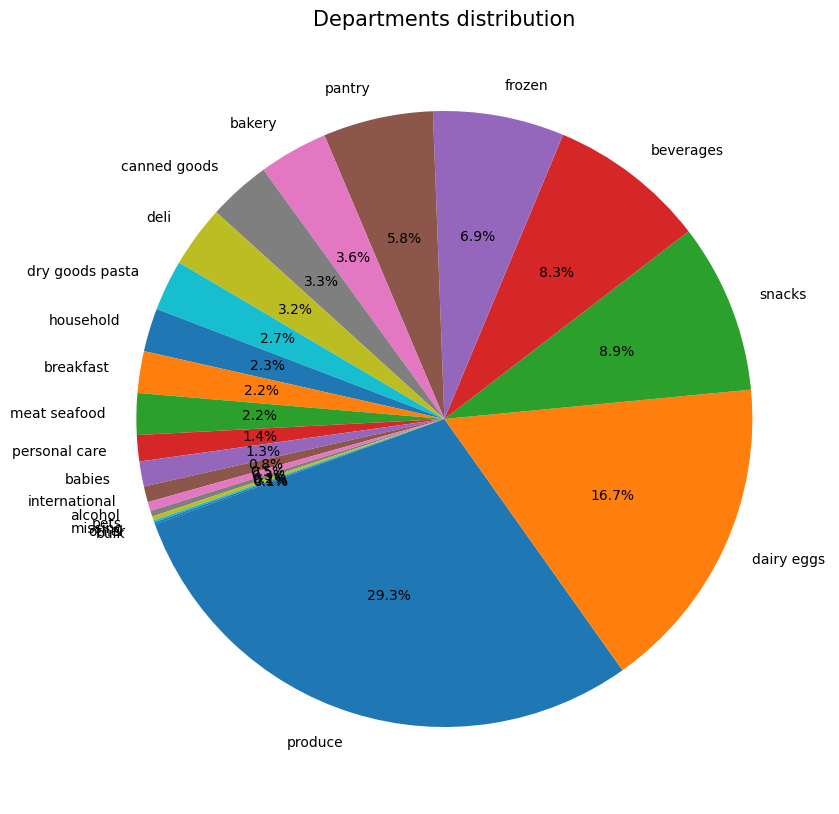

In [ ]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series/temp_series.sum()))*100)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title('Departments distribution', fontsize=15)
plt.show()

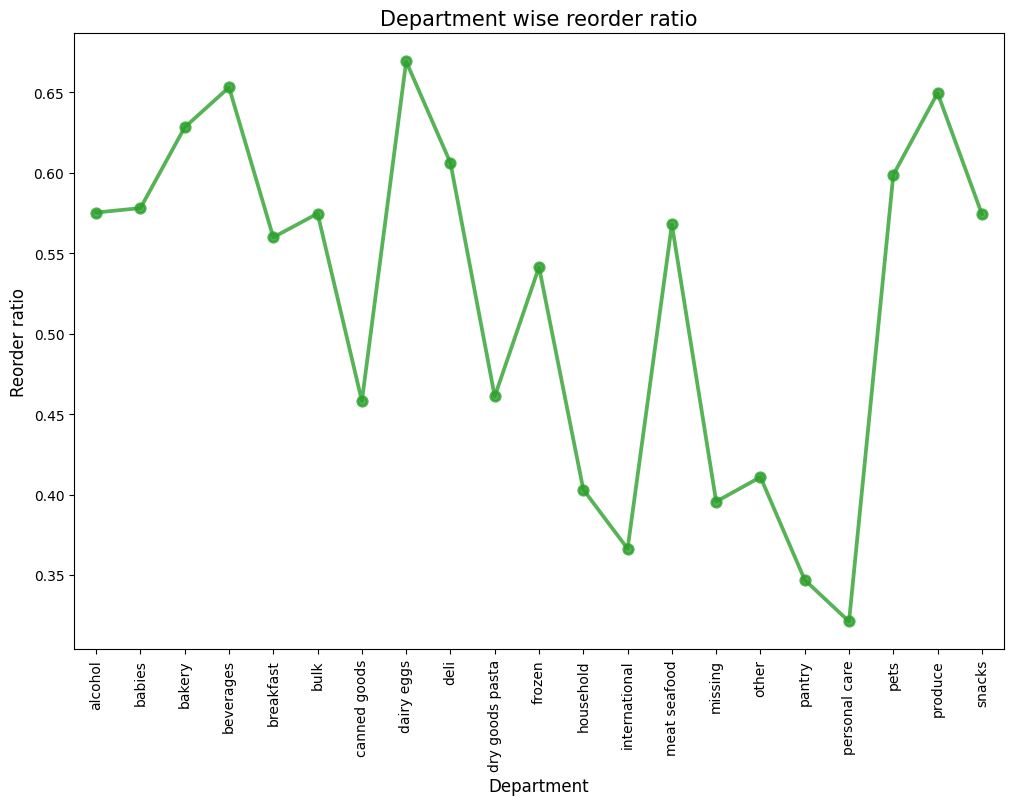

In [ ]:
grouped_df = order_products_prior_df.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department wise reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

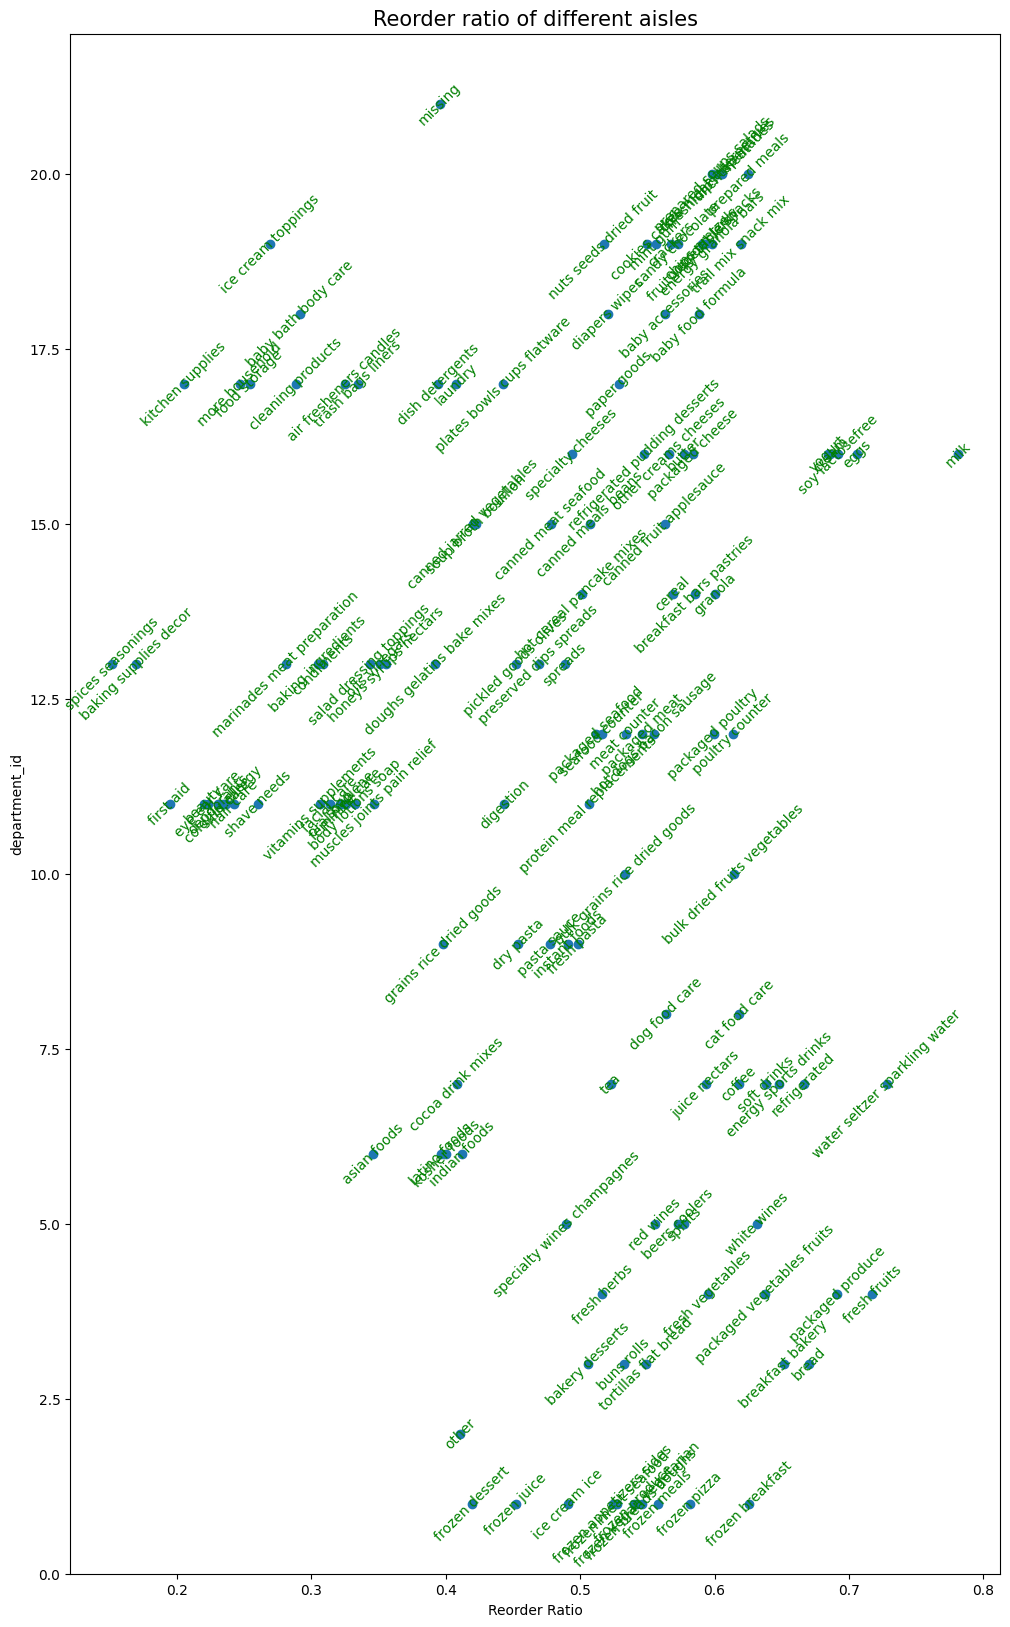

In [ ]:
grouped_df = order_products_prior_df.groupby(['department_id','aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles', fontsize=15)
plt.show()

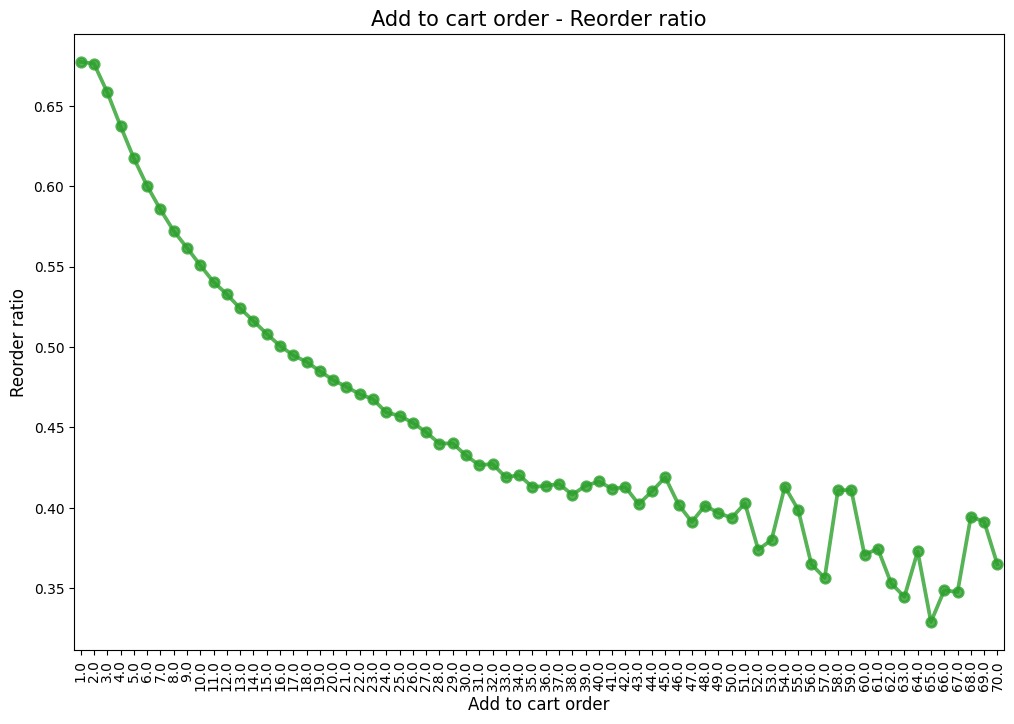

In [ ]:
order_products_prior_df['add_to_cart_order_mod'] = order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70]=70
grouped_df = order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title('Add to cart order - Reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

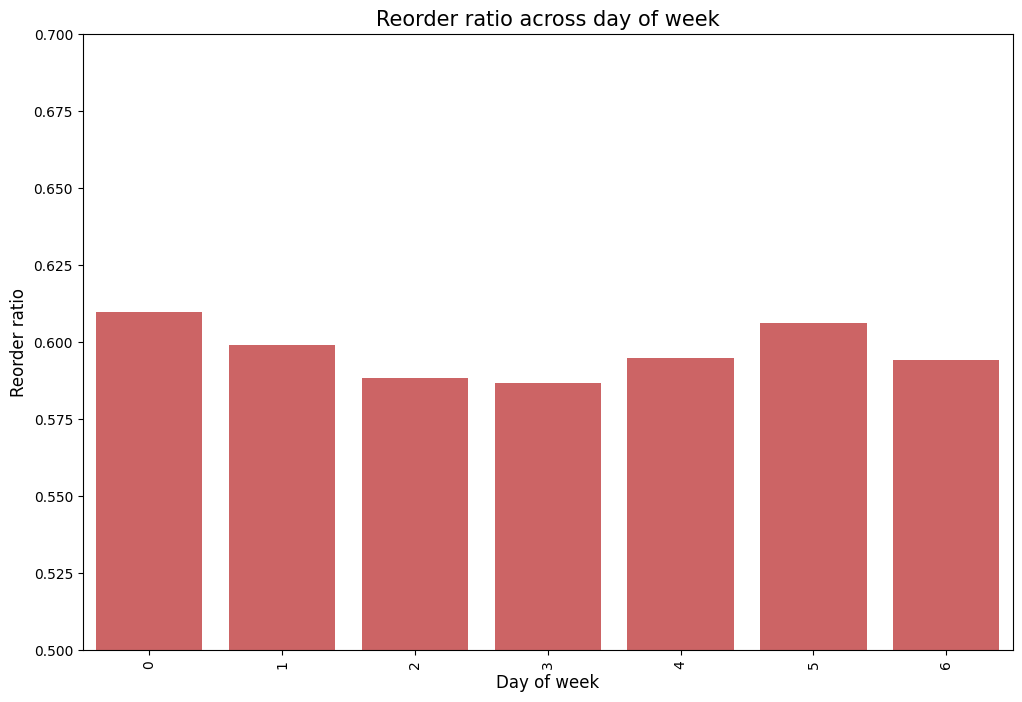

In [ ]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

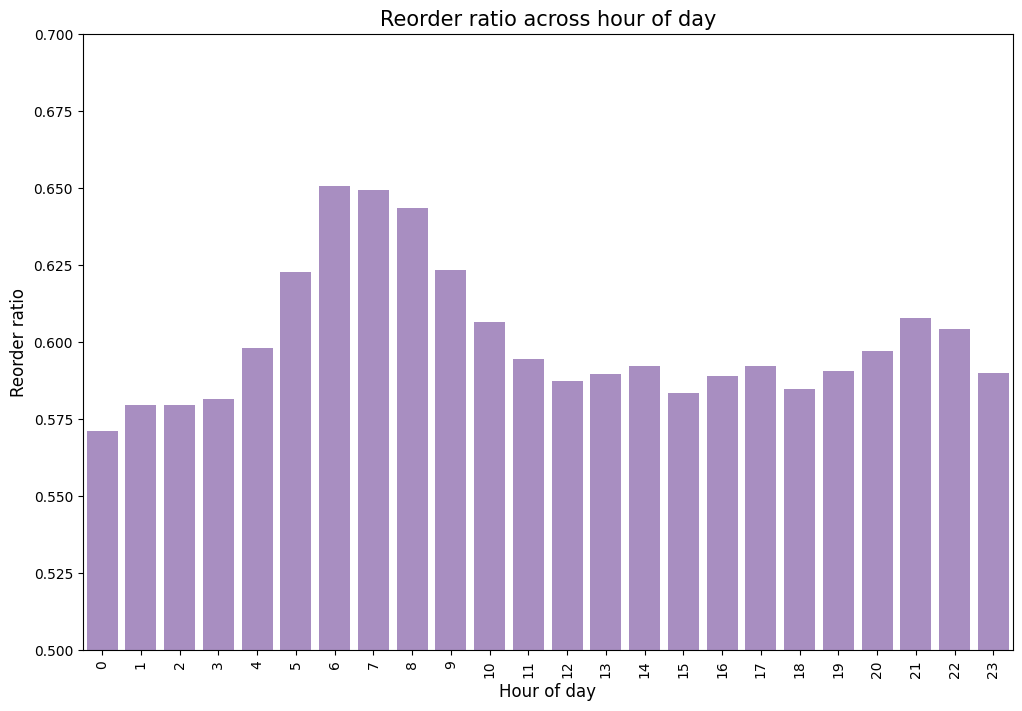

In [ ]:
grouped_df = order_products_train_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

Text(0.5, 1.0, 'Reorder ratio of day of week vs Hour of day')

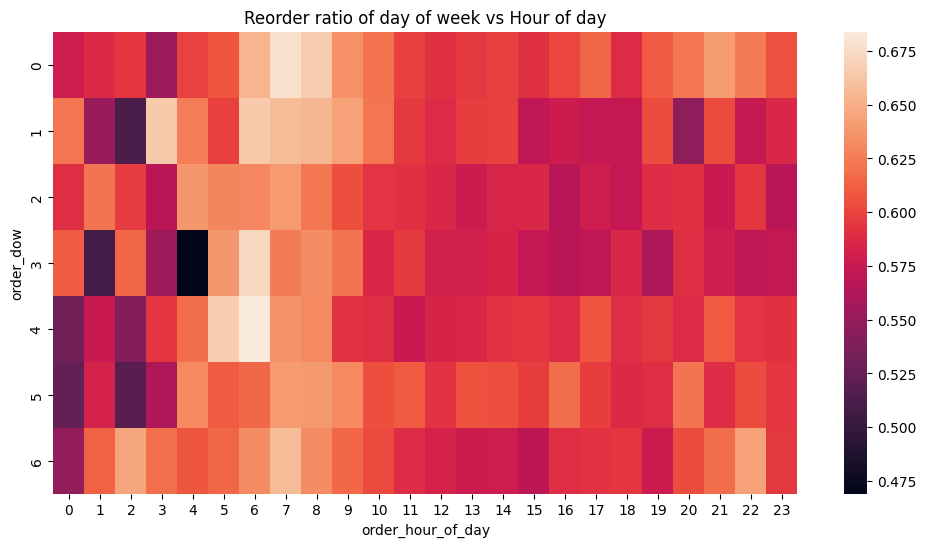

In [ ]:
grouped_df = order_products_train_df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Reorder ratio of day of week vs Hour of day')

새로운 전처리

<department별로 가장 많이 주문된 요일은 무엇일까?>

In [ ]:
merge_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
merge_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,add_to_cart_order_mod,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs,1.0,202279,prior,3,5,9,8.0
1,2,28985.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce,2.0,202279,prior,3,5,9,8.0
2,2,9327.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings,pantry,3.0,202279,prior,3,5,9,8.0
3,2,45918.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars,pantry,4.0,202279,prior,3,5,9,8.0
4,2,30035.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients,pantry,5.0,202279,prior,3,5,9,8.0


In [ ]:
max_order_dow = merge_df.groupby('department')['order_dow'].aggregate(lambda x: x.mode()[0])
max_order_dow

,order_dow
department,
alcohol,5
babies,0
bakery,0
beverages,1
breakfast,1
bulk,1
canned goods,0
dairy eggs,0
deli,0


alcohol은 order_dow가 5인 목요일에 제일 많이 주문되었고, beverages, breakfast, bulk, snacks는 order_dow가 1인 일요일에 제일 많이 주문되었다.

그 외의 department들은 order_dow가 0인 토요일에 제일 많이 주문되었다.